### Creation of database in SQLite

In [1]:
# create database in terminal
'''
sqlite mta_data.db
'''

# add column information to data base in terminal
'''
CREATE TABLE mta_data
(CA TEXT,
UNIT TEXT,
SCP TEXT,
STATION TEXT,
LINENAME TEXT,
DIVISION TEXT,
DATE TEXT,
TIME TEXT,
DESC TEXT,
ENTRIES INTEGER,
EXITS INTEGER,
PRIMARY KEY (CA, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS));
'''

'\nCREATE TABLE mta_data\n(CA TEXT,\nUNIT TEXT,\nSCP TEXT,\nSTATION TEXT,\nLINENAME TEXT,\nDIVISION TEXT,\nDATE TEXT,\nTIME TEXT,\nDESC TEXT,\nENTRIES INTEGER,\nEXITS INTEGER,\nPRIMARY KEY (CA, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS));\n'

### Scrape data from the MTA website

In [2]:
# get csv files of all the week i need with python
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week_num in week_nums: #for each week
        file_url = url.format(week_num) #format the url so it grabs that week
        dfs.append(pd.read_csv(file_url)) #append to our empty list
    return pd.concat(dfs) #combine files for each week
        
week_nums = [210306, 210313, 210320, 210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515, 210522, 210529]
mta = get_data(week_nums)

### Import necessary packages

In [3]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

%matplotlib inline

### Data exploration with SQLAlchemy

In [4]:
# create engine with SQLAlchemy
engine = create_engine("sqlite:////Users/stanguo/NBM_EDA/MTA_EDA_Project/mta_data.db")

In [5]:
# read database into jupyter
mta = pd.read_sql('SELECT * FROM mta_data;', engine)

In [6]:
pd.read_sql('SELECT * FROM mta_data GROUP BY STATION ORDER BY ENTRIES;', engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,N012,R035,01-05-00,168 ST,AC1,IND,02/27/2021,03:00:00,REGULAR,0,0
1,N181A,R464,00-05-00,AQUEDUCT RACETR,A,IND,02/27/2021,03:00:00,REGULAR,0,0
2,PTH17,R541,01-00-00,THIRTY THIRD ST,1,PTH,02/27/2021,02:22:16,REGULAR,0,0
3,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,02/27/2021,00:00:00,REGULAR,50,174
4,R106,R305,01-00-00,WTC-CORTLANDT,1,IRT,02/27/2021,00:00:00,REGULAR,139,136
...,...,...,...,...,...,...,...,...,...,...,...
374,B012,R196,00-00-00,PROSPECT PARK,BQS,BMT,02/27/2021,03:00:00,REGULAR,1569273922,785964315
375,N203,R195,00-00-00,161/YANKEE STAD,BD4,IND,02/27/2021,03:22:00,REGULAR,1627471063,1627574446
376,R288,R275,00-00-00,183 ST,4,IRT,02/27/2021,03:00:00,REGULAR,1781670889,1865862474
377,C008,R099,00-00-00,DEKALB AV,BDNQR,BMT,02/27/2021,03:00:00,REGULAR,1999615494,1850956749


In [7]:
pd.read_sql('SELECT * FROM mta_data WHERE station = "168 ST" GROUP BY linename;', engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R182,R035,00-00-00,168 ST,1AC,IRT,02/27/2021,03:00:00,REGULAR,401067,5659156
1,N012,R035,01-05-00,168 ST,AC1,IND,02/27/2021,03:00:00,REGULAR,0,0


In [8]:
pd.read_sql('SELECT station, LENGTH(division) AS "NUMBER_OF_DIVISIONS" FROM mta_data;', engine)

,STATION,NUMBER_OF_DIVISIONS
0,59 ST,3
1,59 ST,3
2,59 ST,3
3,59 ST,3
4,59 ST,3
...,...,...
2717752,RIT-ROOSEVELT,3
2717753,RIT-ROOSEVELT,3
2717754,RIT-ROOSEVELT,3
2717755,RIT-ROOSEVELT,3


In [9]:
pd.read_sql('SELECT COUNT(station) linename FROM mta_data GROUP BY station HAVING COUNT(linename) > 3;', engine)

,linename
0,13183
1,8178
2,4905
3,4916
4,3265
...,...
374,2723
375,9839
376,19071
377,1643


In [10]:
pd.read_sql('SELECT * FROM mta_data WHERE linename LIKE("%6%");', engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582
...,...,...,...,...,...,...,...,...,...,...,...
337030,R423,R429,00-05-01,PELHAM BAY PARK,6,IRT,05/28/2021,04:00:00,REGULAR,0,103
337031,R423,R429,00-05-01,PELHAM BAY PARK,6,IRT,05/28/2021,08:00:00,REGULAR,0,103
337032,R423,R429,00-05-01,PELHAM BAY PARK,6,IRT,05/28/2021,12:00:00,REGULAR,0,103
337033,R423,R429,00-05-01,PELHAM BAY PARK,6,IRT,05/28/2021,16:00:00,REGULAR,0,103


### Data exploration with Pandas

In [11]:
# check to see if mta df loads
mta

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582
...,...,...,...,...,...,...,...,...,...,...,...
2717752,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577
2717753,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577
2717754,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577
2717755,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577


In [12]:
# get info about df, show_counts = True is used to display Non_Null Count, all Non_Null Counts are the same,
# means that there are no missing values
mta.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717757 entries, 0 to 2717756
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   CA        2717757 non-null  object
 1   UNIT      2717757 non-null  object
 2   SCP       2717757 non-null  object
 3   STATION   2717757 non-null  object
 4   LINENAME  2717757 non-null  object
 5   DIVISION  2717757 non-null  object
 6   DATE      2717757 non-null  object
 7   TIME      2717757 non-null  object
 8   DESC      2717757 non-null  object
 9   ENTRIES   2717757 non-null  int64 
 10  EXITS     2717757 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 228.1+ MB


In [13]:
mta.shape

(2717757, 11)

In [14]:
mta.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [15]:
# get the number of rows for each date, .sort_index is used to sort the index in ascending order
mta['DATE'].value_counts().sort_index()

02/27/2021    29985
02/28/2021    29763
03/01/2021    29868
03/02/2021    29803
03/03/2021    29871
              ...  
05/24/2021    29828
05/25/2021    29855
05/26/2021    29834
05/27/2021    29905
05/28/2021    29894
Name: DATE, Length: 91, dtype: int64

### Create a new column titled DATETIME in the MTA dataframe

In [16]:
mta['DATETIME'] = pd.to_datetime(mta['DATE'] + ' ' + mta['TIME'], format = '%m/%d/%Y %H:%M:%S')
mta

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2717752,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,08:20:35,REGULAR,5554,577,2021-05-28 08:20:35
2717753,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,09:00:00,REGULAR,5554,577,2021-05-28 09:00:00
2717754,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,13:00:00,REGULAR,5554,577,2021-05-28 13:00:00
2717755,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/28/2021,17:00:00,REGULAR,5554,577,2021-05-28 17:00:00


### Check for duplicates in our dataframe

In [17]:
(mta.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
 .EXITS.count()
 .reset_index()
 .sort_values('EXITS', ascending = False)
 .head()
)

# looks like there are duplicates, some rows have EXITS values of 2 meaning there are two entries for the EXIT
# value in the mta df

,CA,UNIT,SCP,STATION,DATETIME,EXITS
737501,N071,R013,00-00-04,34 ST-PENN STA,2021-04-08 08:00:00,2
833187,N100,R252,00-00-00,HIGH ST,2021-03-09 07:00:00,2
833181,N100,R252,00-00-00,HIGH ST,2021-03-08 07:00:00,2
833182,N100,R252,00-00-00,HIGH ST,2021-03-08 11:00:00,2
833183,N100,R252,00-00-00,HIGH ST,2021-03-08 15:00:00,2


In [18]:
# get more detail on a duplciate row by setting a filter and locating it
mask_dup = (
    (mta['CA'] == 'N071') &
    (mta['UNIT'] == 'R013') &
    (mta['SCP'] == '00-00-00') &
    (mta['STATION'] == '34 ST-PENN STA') &
    (mta['DATETIME'].dt.date == datetime.datetime(2021, 4, 8).date())
)

# locate filter
mta[mask_dup].head(10)

# from the results, it seems that duplicated rows with 2 EXITS entries have a DESC value of RECOVR AUD

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1100662,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,00:00:00,REGULAR,6336192,17886768,2021-04-08 00:00:00
1100663,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,04:00:00,REGULAR,6336196,17886776,2021-04-08 04:00:00
1100664,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,06:40:30,REGULAR,241144,732064,2021-04-08 06:40:30
1100665,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,06:41:49,REGULAR,241145,732076,2021-04-08 06:41:49
1100666,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,08:00:00,REGULAR,241178,732169,2021-04-08 08:00:00
1100667,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,08:00:00,RECOVR AUD,6336210,17886963,2021-04-08 08:00:00
1100668,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,12:00:00,RECOVR AUD,6336244,17887217,2021-04-08 12:00:00
1100669,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,16:00:00,REGULAR,6336341,17887530,2021-04-08 16:00:00
1100670,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,04/08/2021,20:00:00,REGULAR,6336477,17887839,2021-04-08 20:00:00


In [19]:
# check how many rows have a DESC value of RECOVR AUD
mta['DESC'].value_counts()

REGULAR       2707755
RECOVR AUD      10002
Name: DESC, dtype: int64

In [20]:
mta_drop = mta.drop_duplicates(subset = ['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
mta_drop = mta_drop[mta_drop['DESC'] == 'REGULAR'] # **
mta_drop.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,REGULAR,7537589,2570596,2021-02-27 23:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,03:00:00,REGULAR,7537598,2570598,2021-02-28 03:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,07:00:00,REGULAR,7537602,2570602,2021-02-28 07:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,11:00:00,REGULAR,7537625,2570637,2021-02-28 11:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/28/2021,15:00:00,REGULAR,7537696,2570671,2021-02-28 15:00:00


In [21]:
# it seems that the duplicates have been dropped but to make sure, we check the number of
# unique values in the DESC column
mta_drop['DESC'].nunique()

1

In [22]:
# within the new filter where the dupes have been dropped, check for duplicates
(mta_drop.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME'])
 .EXITS.count()
 .reset_index()
 .sort_values('EXITS', ascending = False)
 .head()
)

,CA,UNIT,SCP,STATION,DATETIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
1805164,R138,R293,00-05-01,34 ST-PENN STA,2021-04-26 02:00:00,1
1805166,R138,R293,00-05-01,34 ST-PENN STA,2021-04-26 10:00:00,1
1805167,R138,R293,00-05-01,34 ST-PENN STA,2021-04-26 14:00:00,1
1805168,R138,R293,00-05-01,34 ST-PENN STA,2021-04-26 18:00:00,1


### Get maximum exits per day for each unique turnstile around the city

In [23]:
# create a new df called mta_dailymax from mta_drop df to get the max entries per day, per turnstile
mta_dailymax = (mta_drop.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False)
                .EXITS.max()
               )

mta_dailymax

# mta_dailymax results reads as following: for this specific turnstile at this specific station, regardless of time
# the max number of exits is 'X'

,CA,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,02/27/2021,2570596
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472
...,...,...,...,...,...,...
454168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/24/2021,574
454169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2021,574
454170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2021,577
454171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2021,577


In [24]:
# using mta_dailymax, for each turnstile see previous day's exits
mta_dailymax[['PREV_DATE', 'PREV_EXITS']] = (mta_dailymax.groupby(['CA', 'UNIT', 'SCP', 'STATION'])
                                             [['DATE', 'EXITS']]
                                             .shift(1)
                                            )
mta_dailymax

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,02/27/2021,2570596,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0
...,...,...,...,...,...,...,...,...
454168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/24/2021,574,05/23/2021,564.0
454169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2021,574,05/24/2021,574.0
454170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2021,577,05/25/2021,574.0
454171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2021,577,05/26/2021,577.0


In [25]:
# drop the first row containing NaN
# exits are in order bc we sorted by exits.max
mta_dailymax.dropna(subset = ['PREV_DATE'], inplace = True)
mta_dailymax

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0
5,A002,R051,02-00-00,59 ST,03/04/2021,2571750,03/03/2021,2571472.0
...,...,...,...,...,...,...,...,...
454168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/24/2021,574,05/23/2021,564.0
454169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2021,574,05/24/2021,574.0
454170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2021,577,05/25/2021,574.0
454171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2021,577,05/26/2021,577.0


In [26]:
# check to see which rows where unique daily turnstile exits are less than previous daily exits
neg_exit_change = (mta_dailymax['EXITS'] < mta_dailymax['PREV_EXITS'])
mta_dailymax[neg_exit_change]

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
388,A002,R051,02-03-02,59 ST,03/23/2021,701,03/22/2021,8.869858e+06
3550,A011,R080,01-03-00,57 ST-7 AV,02/28/2021,489658818,02/27/2021,4.896595e+08
3551,A011,R080,01-03-00,57 ST-7 AV,03/01/2021,489658301,02/28/2021,4.896588e+08
3552,A011,R080,01-03-00,57 ST-7 AV,03/02/2021,489657439,03/01/2021,4.896583e+08
3553,A011,R080,01-03-00,57 ST-7 AV,03/03/2021,489656568,03/02/2021,4.896574e+08
...,...,...,...,...,...,...,...,...
437615,R622,R123,00-00-00,FRANKLIN AV,05/28/2021,2062019877,05/27/2021,2.062020e+09
438721,R624,R124,00-00-02,KINGSTON AV,03/12/2021,1031,03/11/2021,8.157517e+06
450751,S101,R070,00-00-04,ST. GEORGE,04/02/2021,0,04/01/2021,1.740000e+02
454077,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/22/2021,0,05/21/2021,6.200000e+01


In [27]:
# 218 turnstiles have PREV_EXITS greater than EXITS
(mta_dailymax[mta_dailymax['EXITS'] < mta_dailymax['PREV_EXITS']]
 .groupby(["CA", "UNIT", "SCP", "STATION"])
 .size()
)

CA     UNIT  SCP       STATION      
A002   R051  02-03-02  59 ST             1
A011   R080  01-03-00  57 ST-7 AV       90
             01-03-03  57 ST-7 AV        1
             01-03-04  57 ST-7 AV        1
A013   R081  01-06-01  49 ST             1
                                        ..
R617   R058  00-00-02  BERGEN ST         1
R622   R123  00-00-00  FRANKLIN AV      90
R624   R124  00-00-02  KINGSTON AV       1
S101   R070  00-00-04  ST. GEORGE        1
TRAM2  R469  00-05-00  RIT-ROOSEVELT     2
Length: 218, dtype: int64

In [28]:
# fix the counter issue from above line
def get_daily_counts(row, max_counter):
    counter = row['EXITS'] - row['PREV_EXITS']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row['EXITS'], row['PREV_EXITS'])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

mta_dailymax['DAILY_EXITS'] = mta_dailymax.apply(get_daily_counts, axis = 1, max_counter = 1000000)

### Get total number of exits for each station over the three-month period

In [29]:
mta_daily_sum = mta_dailymax.groupby(['STATION'])[['DAILY_EXITS']].sum().reset_index().rename(columns = {'DAILY_EXITS' : 'SUM_DAILY_EXITS'})
busiest = mta_daily_sum.sort_values('SUM_DAILY_EXITS', ascending = False).head(6)
busiest

,STATION,SUM_DAILY_EXITS
61,34 ST-PENN STA,4812023.0
59,34 ST-HERALD SQ,4196093.0
46,23 ST,3794326.0
9,125 ST,3568621.0
110,86 ST,3498880.0
233,GRD CNTRL-42 ST,2838598.0


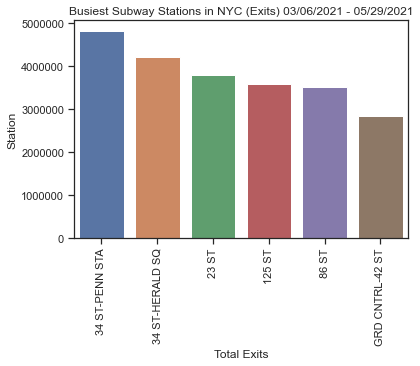

In [35]:
x = busiest.STATION
y = busiest.SUM_DAILY_EXITS

sns.barplot(x = x, y = y, data = busiest)
sns.set(style = 'ticks')
plt.title('Busiest Subway Stations in NYC (Exits) 03/06/2021 - 05/29/2021')
plt.xlabel('Total Exits')
plt.xticks(rotation = 90)
plt.ylabel('Station')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.savefig('busiest_mta_stations.png');

### Get total number of exits for each station on each day of the week over the three-month period

In [31]:
# create new column in mta_dailymax titled 'DAY_OF_WEEK'
mta_dailymax['DAY_OF_WEEK'] = pd.to_datetime(mta_dailymax['DATE']).dt.weekday
mta_dailymax

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS,DAY_OF_WEEK
1,A002,R051,02-00-00,59 ST,02/28/2021,2570717,02/27/2021,2570596.0,121.0,6
2,A002,R051,02-00-00,59 ST,03/01/2021,2570968,02/28/2021,2570717.0,251.0,0
3,A002,R051,02-00-00,59 ST,03/02/2021,2571211,03/01/2021,2570968.0,243.0,1
4,A002,R051,02-00-00,59 ST,03/03/2021,2571472,03/02/2021,2571211.0,261.0,2
5,A002,R051,02-00-00,59 ST,03/04/2021,2571750,03/03/2021,2571472.0,278.0,3
...,...,...,...,...,...,...,...,...,...,...
454168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/24/2021,574,05/23/2021,564.0,10.0,0
454169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/25/2021,574,05/24/2021,574.0,0.0,1
454170,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/26/2021,577,05/25/2021,574.0,3.0,2
454171,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/27/2021,577,05/26/2021,577.0,0.0,3


In [32]:
# select top 5 busiest stations from sns plot
# we don't use '34 ST-HERALD SQ' because it is too close in proximity to '34 ST-PENN STA'
# 'GRD CNTRL-42 ST' will takes its place

busiest_sta = ((mta_dailymax['STATION'] == '34 ST-PENN STA') |
               (mta_dailymax['STATION'] == '23 ST') |
               (mta_dailymax['STATION'] == '125 ST') |
               (mta_dailymax['STATION'] == '86 ST') |
               (mta_dailymax['STATION'] == 'GRD CNTRL-42 ST')
              )
                
days = {0 : 'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu', 4 : 'Fri', 5 : 'Sat', 6: 'Sun'}

mta_dailymax_total = (mta_dailymax[busiest_sta].groupby(['STATION', 'DAY_OF_WEEK'])
                      [['DAILY_EXITS']].sum()
                      .reset_index()
                      .rename(columns = {'DAILY_EXITS' : 'TOTAL_DAILY_EXITS'}))

mta_dailymax_total['DAY_OF_WEEK'] = mta_dailymax_total['DAY_OF_WEEK'].map(days)
mta_dailymax_total

,STATION,DAY_OF_WEEK,TOTAL_DAILY_EXITS
0,125 ST,Mon,411461.0
1,125 ST,Tue,466770.0
2,125 ST,Wed,436601.0
3,125 ST,Thu,1204238.0
4,125 ST,Fri,449655.0
5,125 ST,Sat,326170.0
6,125 ST,Sun,273726.0
7,23 ST,Mon,878818.0
8,23 ST,Tue,1325217.0
9,23 ST,Wed,386063.0


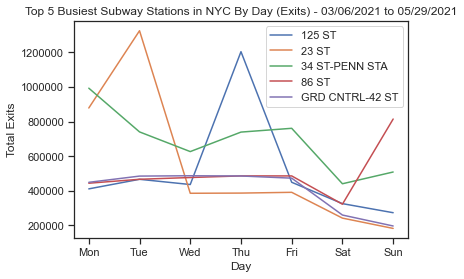

In [33]:
x = mta_dailymax_total['DAY_OF_WEEK']
y = mta_dailymax_total['TOTAL_DAILY_EXITS']

sns.lineplot(x = x, y = y, hue = mta_dailymax_total['STATION'], data = mta_dailymax_total)
sns.set(style = 'ticks')
plt.title('Top 5 Busiest Subway Stations in NYC By Day (Exits) - 03/06/2021 to 05/29/2021')
plt.xlabel('Day')
plt.ylabel('Total Exits')
plt.legend()
plt.ticklabel_format(style = 'plain', axis = 'y')

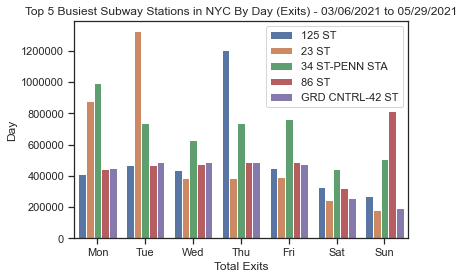

In [34]:
# plot top five busiest stations on each day of the week
x = mta_dailymax_total['DAY_OF_WEEK']
y = mta_dailymax_total['TOTAL_DAILY_EXITS']

sns.barplot(x = x, y = y, hue = mta_dailymax_total['STATION'] ,data = busiest)
sns.set(style = 'ticks')
plt.legend()
plt.title('Top 5 Busiest Subway Stations in NYC By Day (Exits) - 03/06/2021 to 05/29/2021')
plt.xlabel('Total Exits')
plt.ylabel('Day')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.savefig('busiest_mta_stations_day.png');